<a href="https://colab.research.google.com/github/SworajKhadka/Dstuff/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/tested.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Now we will proceed with the very first step in EDA and that is univariate analysis of the data

In [7]:
#moving on to the variables, we will be marking the age and the gender over here for now
df['Age'].isnull().sum()

np.int64(86)

<Axes: ylabel='Frequency'>

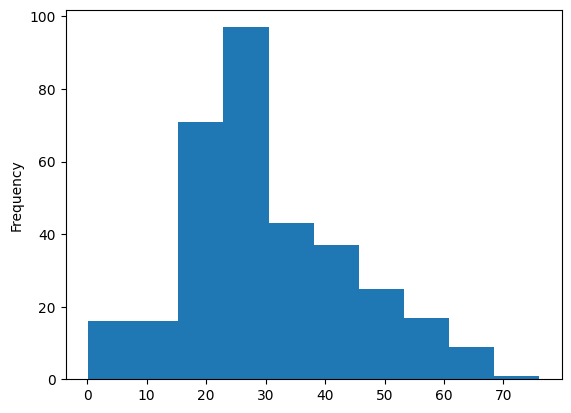

In [8]:
df['Age'].plot(kind='hist')

<Axes: >

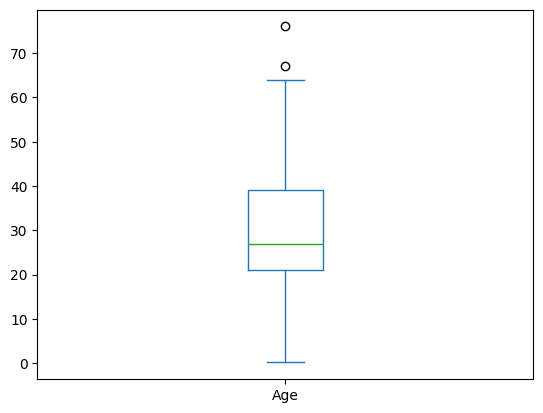

In [9]:
df['Age'].plot(kind='box')

In [10]:
df['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


In [11]:
df['Age'].skew()

np.float64(0.4573612871503845)

In [12]:
#Lets check for the skewness of Fare column in the dataset
df['Fare'].skew()

np.float64(3.6872133081121405)

In [13]:
### Conclusions
#The fare column is highly positively skewed which shows it aint following a normal distribution curve/


In [14]:
#Lets check the survived columns under pie chart and bar chart to see the percetage of people


In [15]:
df['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [16]:
df['Survived'].isnull().sum()

np.int64(0)

df['Survived'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Survived'>

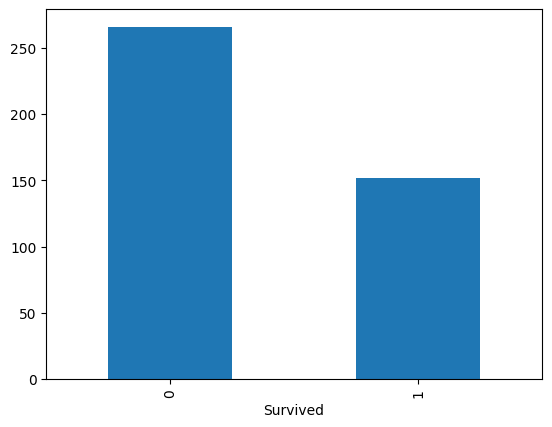

In [17]:
df['Survived'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

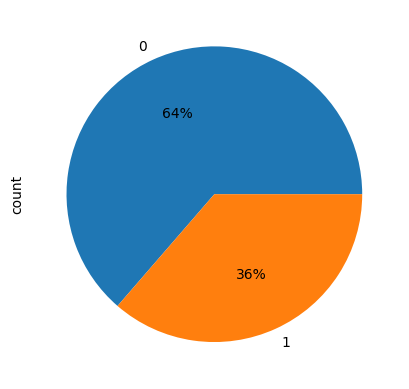

In [18]:
df['Survived'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')

Now we are going to perform the bivariate analysis of the data present above

In [19]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,0,266
1,152,0


In [20]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,0.0,100.0
1,100.0,0.0


In [21]:
(df['Sex']=='male').value_counts()

,count
Sex,
True,266
False,152


<Axes: xlabel='Survived'>

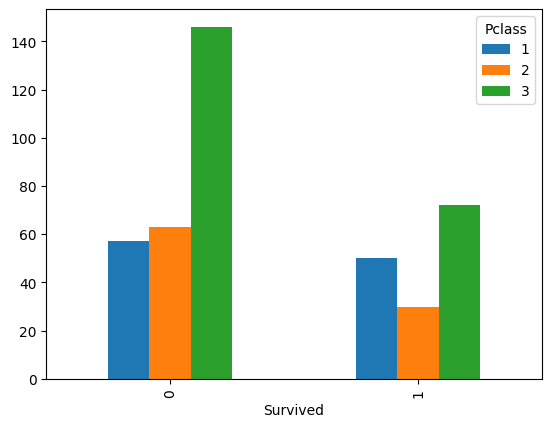

In [22]:
pd.crosstab(df['Survived'],df['Pclass']).plot(kind = 'bar')

In [23]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,53.271028,67.741935,66.972477
1,46.728972,32.258065,33.027523


<Axes: xlabel='Survived'>

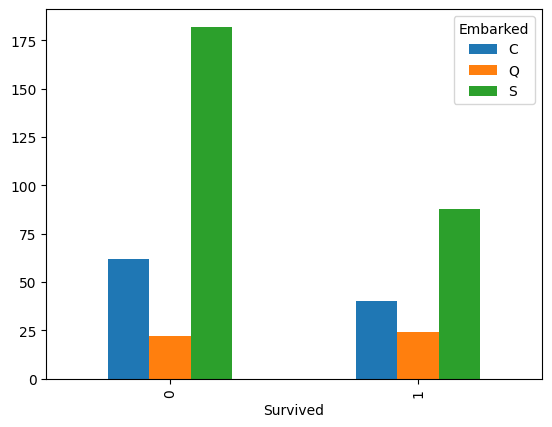

In [24]:
pd.crosstab(df['Survived'],df['Embarked']).plot(kind = 'bar')

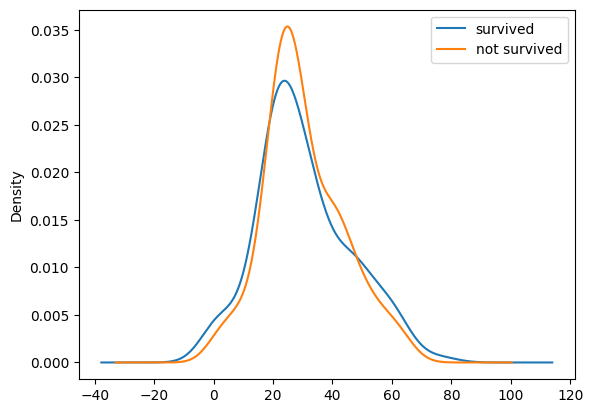

In [25]:
df[df['Survived']==1]['Age'].plot(kind = 'kde',label='survived')
df[df['Survived']==0]['Age'].plot(kind = 'kde',label='not survived')
plt.legend()
plt.show()

Lets do some Feature Engineering on the Fare column as it represents the total sum rather than indiviual fare

In [26]:
df['SibSp'].value_counts()

,count
SibSp,
0,283
1,110
2,14
3,4
4,4
8,2
5,1


In [27]:
df['family']=df['SibSp']+df['Parch']+1

In [30]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,3
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,3


In [34]:
df[df['Name']=='Sage']
#currently we cannot run this since we dont have particular name called 'Sage' , right now they're under the string collectively

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family


In [39]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [41]:
df['surname'].value_counts()

,count
surname,
Asplund,4
Davies,4
Thomas,4
Sage,4
Ware,4
...,...
Brobeck,1
Cribb,1
Kennedy,1


In [42]:
 df['SibSp'].value_counts()

,count
SibSp,
0,283
1,110
2,14
3,4
4,4
8,2
5,1


In [43]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,surname
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,Sage
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,11,Sage


In [47]:
df[df['family']==11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,surname
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,Sage
342,1234,0,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,11,Sage
360,1252,0,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,11,Sage
365,1257,1,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,11,Sage


In [48]:
#what we can do is, divide the ticket fare by respective family_size to see individual fare

In [51]:
df['Individual_Fare'] = df['Fare']/df['family']

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,surname,Individual_Fare
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Kelly,7.829200
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Wilkes,3.500000
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Myles,9.687500
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Wirz,8.662500
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Hirvonen,4.095833


In [56]:
pd.crosstab(df['Pclass'],df['Individual_Fare'])

Individual_Fare,0.000000,1.110714,1.585400,2.409733,2.683333,2.838900,2.887500,3.218750,3.247900,3.500000,...,113.762500,134.500000,135.633300,151.550000,164.866700,211.337500,211.500000,221.779200,256.164600,262.375000
Pclass,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,1,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


#lets generate the function for which we get to classify the family into family type ;

In [58]:
def family_type(s):
    if s==1:
        return 'alone'
    elif s>1 and s<5:
        return 'small'
    else:
        return 'big'

In [59]:
df['family type'] = df['family'].apply(family_type)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,surname,Individual_Fare,family type
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Kelly,7.829200,alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Wilkes,3.500000,small
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Myles,9.687500,alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Wirz,8.662500,alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Hirvonen,4.095833,small


In [61]:
df['family type'].value_counts()

,count
family type,
alone,253
small,145
big,20


In [63]:
pd.crosstab(df['Pclass'],df['family type'],normalize='columns')*100

family type,alone,big,small
Pclass,,,
1,20.158103,25.0,35.172414
2,21.343874,0.0,26.896552
3,58.498024,75.0,37.931034


In [65]:
pd.crosstab(df['Survived'],df['family type'],normalize = 'columns')*100

family type,alone,big,small
Survived,,,
0,73.12253,60.0,47.586207
1,26.87747,40.0,52.413793


In [66]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,surname,Individual_Fare,family type
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Kelly,7.829200,alone
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Wilkes,3.500000,small
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Myles,9.687500,alone
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Wirz,8.662500,alone
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Hirvonen,4.095833,small


# Conclusions drawn from these: Although it is an incomplete dataset, we figured out the analysis between the Pclass and their survival percentage showing people travelling from 1 class have higher chances of surviving as well as the people travelling with small family size,